In [54]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import numpy as np
from pathlib import Path

In [38]:
plt.rc("font", family="serif")
plt.rc("text", usetex=True)
plt.rc("figure", autolayout=True)
plt.rc("font", size=12)
plt.rc("ytick", alignment="center")
plt.style.use("seaborn-muted")

In [39]:
data = [
    {
        "name": "\\texttt{case.c}",
        "unoptimised": 683,
        "optimised": 238
    },
    {
        "name": "\\texttt{fibonacci.c}",
        "unoptimised": 1256,
        "optimised": 412
    },
    {
        "name": "\\texttt{game-of-life.c} (blinker)",
        "unoptimised": 2256,
        "optimised": 683
    },
    {
        "name": "\\texttt{game-of-life.c} (pulsar)",
        "unoptimised": 2668, "optimised": 1095
    },
    {
        "name": "\\texttt{gcd.c} (TC opt.)",
        "unoptimised": 351,
        "optimised": 177
    },
    {
        "name": "\\texttt{gcd.c} (not TC opt.)",
        "unoptimised": 1339,
        "optimised": 681
    },
    {
        "name": "\\texttt{hexify.c}",
        "unoptimised": 593,
        "optimised": 239
    },
    {
        "name": "\\texttt{non-recursive-tail-call.c}",
        "unoptimised": 721,
        "optimised": 423
    },
    {
        "name": "\\texttt{occurrences.c}",
        "unoptimised": 295,
        "optimised": 195
    },
    {
        "name": "\\texttt{strlen.c}",
        "unoptimised": 156,
        "optimised": 140
    },
    {
        "name": "\\texttt{tail-call-sum.c} (TC opt.)",
        "unoptimised": 299,
        "optimised": 175
    },
    {
        "name": "\\texttt{tail-call-sum.c} (not TC opt.)",
        "unoptimised": 46306,
        "optimised": 22174
    },
    {
        "name": "\\texttt{trim.c}",
        "unoptimised": 350,
        "optimised": 169
    },
    {
        "name": "\\texttt{wildcardcmp.c}",
        "unoptimised": 733,
        "optimised": 339
    },
]


In [40]:
program_names = []
unoptimised = []
optimised = []

for program in data:
    program_names.append(program["name"])
    unoptimised.append(program["unoptimised"])
    optimised.append(program["optimised"])

unoptimised = np.array(unoptimised)
optimised = np.array(optimised)

optimised_percent = optimised / unoptimised
unoptimised_percent = np.full(unoptimised.shape, 1.)

In [65]:
# COLOR_UNOPTIMISED = "#82C6E2"
COLOR_UNOPTIMISED = "#80dcff"
# COLOR_UNOPTIMISED = "#64B5CD"
# COLOR_OPTIMISED = "#4878D0"
COLOR_OPTIMISED = "#5977ff"

COLOR_GRID = "#88d1d1"

In [42]:
OUTPUT_PATH = Path("40-stack-use-across-programs.pgf").resolve()

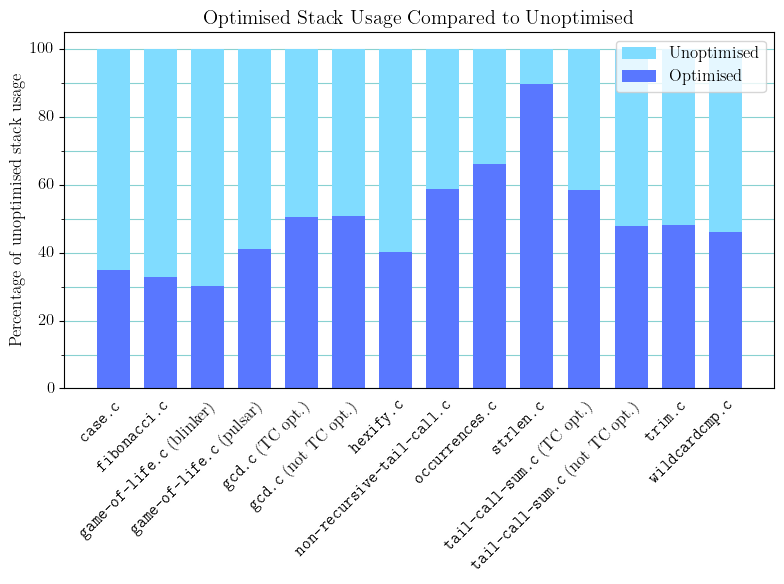

In [66]:
fig, ax = plt.subplots(figsize=(8, 6))

bottom = np.zeros(len(program_names))

WIDTH = 0.7

ax.bar(program_names, unoptimised_percent, color=COLOR_UNOPTIMISED, width=WIDTH, label="Unoptimised")
ax.bar(program_names, optimised_percent, color=COLOR_OPTIMISED, width=WIDTH, label="Optimised")

ax.legend()

ax.set_title("Optimised Stack Usage Compared to Unoptimised")

ax.set_ylabel("Percentage of unoptimised stack usage")

plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    )

# ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_major_formatter(lambda x, pos: str(int(np.round(x*100, 0))) + "%")

ax.yaxis.set_minor_locator(MultipleLocator(0.1))

# put the grid behind the bars
ax.set_axisbelow(True)
ax.grid(axis="y", which="both", color=COLOR_GRID)

plt.savefig(OUTPUT_PATH)

plt.show()